# Data Analysis and Data Science
## Be curious about the method 

By: Caroline Labelle
<br>For: BIM6065-C

<br>
Date: July 4th, 2023

<hr style="border:1px solid black"> </hr>

Student Name: Mateusz Checinski

Complete the following exercises and submit your Notebook in a HTML format on StudiUM. You have until July 5th, noon to hand-in your Notebook.

In [1]:
### Import sklearn
import sklearn.decomposition, sklearn.cluster

### Import scipy
import scipy as sp

### Import pandas, numpy, seaborn and matplotlib.pyplot
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
sns.set(rc={'figure.figsize':(4, 2)})
sns.set_theme(context="notebook", style="white", palette="Set2")

## Genes correlation [25 pts]

In [3]:
### Import and clean the Gene expression cancer 1 dataset
fn = "/u/checinsm/gene_expression_cancer_1.csv"
data = pd.read_csv(fn)
data.head()

,ESR1,PGR,BCL2,NAT1,Results
0,5.1,3.5,1.4,0.2,Cured
1,4.9,3.0,1.4,0.2,Cured
2,4.7,3.2,1.3,0.2,Cured
3,4.6,3.1,1.5,0.2,Cured
4,5.0,3.6,1.4,0.2,Cured


### Global correlation [6 pts]

Pearson correlation coefficient: -0.10936924995064938
 
Interpretation: The plot Pearson correlation coefficient (PCC) which is much closer to 0 rather than 1 or -1 (-0.1094). This suggests there is not much significance between PGR and ESR1 expression  
 
However, it is important to note that even a PCC of 0 does not explicitly imply no correlation. The correlation might not be linear but may be exponential as an example.


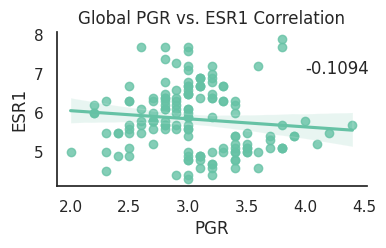

In [4]:
### Consider the PGR and ESR1 genes. Do the expression of these two genes correlates?
### Consider the entire dataset.
### Answer the question with a Pearson correlation coefficient, a plot and brief interpretation of your results.

reg = sp.stats.linregress(x=data.PGR , y=data.ESR1, alternative="two-sided")
print("Pearson correlation coefficient:" ,reg.rvalue)

p = sns.regplot(data, x="PGR", y="ESR1")
p.text(4,7, np.round(reg.rvalue, 4))
p.set_title("Global PGR vs. ESR1 Correlation")
sns.despine()



print(" ")
print("Interpretation: The plot Pearson correlation coefficient (PCC) which is much closer to 0 rather than 1 or -1 (-0.1094). This suggests there is not much significance between PGR and ESR1 expression  ")
print(" ")
print("However, it is important to note that even a PCC of 0 does not explicitly imply no correlation. The correlation might not be linear but may be exponential as an example.")

### Grouped correlations [14 pts]

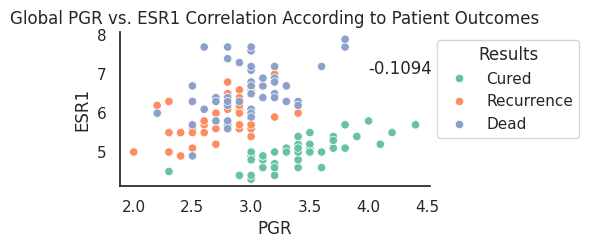

In [5]:
p = sns.scatterplot(data, x="PGR", y="ESR1", hue="Results")
sns.move_legend(p, "upper left", bbox_to_anchor=(1,1))
p.text(4,7, np.round(reg.rvalue, 4))
p.set_title("Global PGR vs. ESR1 Correlation According to Patient Outcomes")
sns.despine()

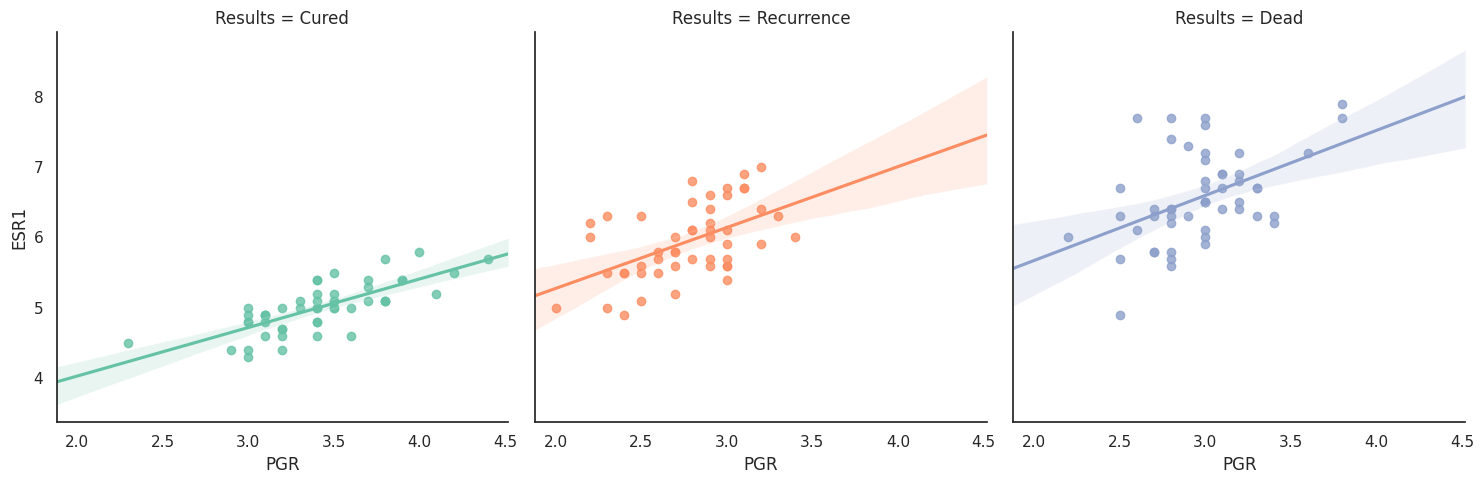

In [6]:
sns.lmplot(data=data, x="PGR", y="ESR1", truncate=False, hue="Results", col="Results")
sns.despine()

In [7]:
reg = sp.stats.linregress(x=data.PGR , y=data.ESR1, alternative="two-sided")
print("Pearson correlation coefficient:" ,reg.rvalue)

Pearson correlation coefficient: -0.10936924995064938


In [8]:
#this is taking the entire dataset, want only the two genes? so create new dataset with just these 2 genes

Cured = data.loc[data.Results == "Cured", :]
Recurrence = data.loc[data.Results == "Recurrence", :]
Dead = data.loc[data.Results == "Dead", :]

print("Pearson Correlation Coefficients")
reg = sp.stats.linregress(x=data.PGR , y=data.ESR1, alternative="two-sided")
print("Global:" ,reg.rvalue)

reg_Cured = sp.stats.linregress(x=Cured.PGR , y=Cured.ESR1, alternative="two-sided")
print("Cured: ", reg_Cured.rvalue)

reg_Recurrence = sp.stats.linregress(x=Recurrence.PGR , y=Recurrence.ESR1, alternative="two-sided")
print("Recurrence: ", reg_Recurrence.rvalue)

reg_Dead = sp.stats.linregress(x=Dead.PGR , y=Dead.ESR1, alternative="two-sided")
print("Dead: ", reg_Dead.rvalue)

Pearson Correlation Coefficients
Global: -0.10936924995064938
Cured:  0.7467803732639268
Recurrence:  0.5280216842864213
Dead:  0.46200631074260196


### Spearman's rank correlation [5 pts]

In [9]:
### Calculate the Spearman' rank correlations for the four comparisons made previously.
### (Global dataset and the three goups)
### Do the results differ? if so, do the conlusions also differ? 
### Briefly explain what are the new conclusions.
print("Spearman' rank correlations:")
speaR = sp.stats.spearmanr(data.PGR, data.ESR1)
print("Global: ", speaR[0])

speaR_Cured = sp.stats.spearmanr(Cured.PGR, Cured.ESR1)
print("Cured: ", speaR_Cured[0])

speaR_Recurrence = sp.stats.spearmanr(Recurrence.PGR, Recurrence.ESR1)
print("Recurrence: ", speaR_Recurrence[0])

speaR_Dead = sp.stats.spearmanr(Dead.PGR, Dead.ESR1)
print("Dead: ", speaR_Dead[0])

print(" ")

print("-The global Spearman' rank correlation, which investigates the monotonicity of the data,") 
print(" is negative and close to 0, meaning there is very little correlation and as x (PGR) increases, y (ESR1) decreases.")
print("-In turn, when analysed individually based on the patient status, the correlations are positive")
print(" meaning as x increases, y also increases and all 3 now show more correlation as observede by the rank further away")
print(" from 0 than that of the global analysis.")
print("-Therefore, with the global dataset, there is no correlation between PGR and ESR1 expression but there is now more correlation when")
print(" visualised based on patient outcome. This is especially true for teh cured dataset which shows")
print(" the highest correltaion.")
print("")
print("-Therefore, it is possible that the expression of these two genes does in fact correlate with the progression of the disease, a method of prognosis and prevention.")

Spearman' rank correlations:
Global:  -0.15945651848582867
Cured:  0.7686085073729368
Recurrence:  0.5180736821877614
Dead:  0.4389928351262457
 
-The global Spearman' rank correlation, which investigates the monotonicity of the data,
 is negative and close to 0, meaning there is very little correlation and as x (PGR) increases, y (ESR1) decreases.
-In turn, when analysed individually based on the patient status, the correlations are positive
 meaning as x increases, y also increases and all 3 now show more correlation as observede by the rank further away
 from 0 than that of the global analysis.
-Therefore, with the global dataset, there is no correlation between PGR and ESR1 expression but there is now more correlation when
 visualised based on patient outcome. This is especially true for teh cured dataset which shows
 the highest correltaion.

-Therefore, it is possible that the expression of these two genes does in fact correlate with the progression of the disease, a method of pr